*  This program computes 
*    the optimal portfolio with n>1 risky asset and 1 risk-free asset 
*     Here we use the 5 industry port and compare the result with investing mkt 

In [ ]:
import pandas as pd                     # To load data, we use the package pandas
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load the data 

df = pd.read_excel('Factors_July26_July11.xlsx')        # It has 5 columns:  date, mkt, size, b/m, riskree rate
                                                    # downloaded from Ken French's website
df2 = pd.read_excel('Indu5_July26_July11.xlsx')       # return on 5 industry portfolios from Ken French's web

mkt = df.loc[:,"mkt"]/100                       # Mkt excess return;  divided by 100 due to data are in %
rf = df.loc[:,"rate"]/100

R1 = df2.loc[:,'Indu1' : 'Indu5']/100        # extract the 5 industry returns, R1 is T by 5. 
print(R1[0:3])                            # check a couple of values

R1 = np.array(R1)                         # convert list to array to apply np.functions, T x 5
rf = np.array(rf)                         # convert list to array to apply np.functions, a T-vector
                                           # note: T, is not Tx1 in Python as the latter is 2-dim

T = len(df)                               # The number of observations 
Re = np.ones((T,5))                     # creat storage for excess returns
                                            # no need, but more clear
for i in range(5):
    Re[:,i] = R1[:,i] - rf                # the excess return:  each indu substracts riskfree rate, Re[:,i]-rf

mu5 = np.mean(Re, axis = 0)              # the mean taking each column of the matrix, a row vector of 5
mu5 = mu5.T                              # make it a column vector
V5 = np.cov(Re.T)                        # the covariance estimate, 5 by 5 

VI = np.linalg.inv(V5)                     # The inverse of V

# The optimal weights on the 5 risky aasets

gamma = 3                             # The risk-averse coeff.

w5 = 1/gamma*np.matmul(VI, mu5)

                        
mu = mkt.mean()                          # The expected mkt excess return
sig2 = mkt.var()                         # The var of the mkt excess return
sigma = np.sqrt(sig2)                    # Its vol

w = (1/gamma)*mu/sig2                     # The optimal weight on mkt

print('   \n')
print('Rsik avrersion and Optimal wight on the market \n')
print('        {0:.4f}  {1:.4f}  \n '.format(gamma,w))   
print('   \n')
print('The Optimal wights on the 5 industries \n')
print(w5)   
w_rf = 1 - np.dot(w5, np.ones((5,1)))
print('   \n')
print('The rest is on riskfree asset \n')
print(w_rf)  

    Indu1   Indu2   Indu3   Indu4   Indu5
0  0.0410  0.0273  0.0183  0.0164  0.0212
1  0.0258  0.0226  0.0241  0.0451  0.0436
2  0.0206 -0.0039  0.0106  0.0061  0.0029
   

Rsik avrersion and Optimal wight on the market 

        3.0000  0.6998  
 
   

The Optimal wights on the 5 industries 

[ 0.69542253  0.6604779   0.05889521  0.54013127 -0.93355514]
   

The rest is on riskfree asset 

[-0.02137177]


In [ ]:
# Compute the Sharpe Ratio of the Opt Port and Mkt


Port=np.ones((T,))                # define this T-vector to store the returns on the portfolio
                                    # to be compatible with rf

Port[0] = np.dot(w5,Re[0]) + rf[0]      # return in the first period, the weight on rf is absorbed 
                                       # into the previous excess return term, see formulas in the slides

for t in range(T):
    Port[t] = np.dot(w5,Re[t]) + rf[t]  

ExPort = Port - rf                       # excess return of the optimla portfolio
muP = ExPort.mean()
sig2P = ExPort.var()
sigP = np.sqrt(sig2P)
SharpeP = np.sqrt(12)*muP/sigP

print(ExPort.shape, Port.shape, rf.shape)   # double check the vectors are cpmpatible

# For the mkt
 
Sharpe = np.sqrt(12)*mu/sigma

print('The Annulized Sharpe ratios of the Opt Port and Mkt \n')
print('          {0:.5f}   {1:.5f}  \n'.format(SharpeP, Sharpe)) 

(1021,) (1021,) (1021,)
0.008366526157297762
0.052783620295316525
The Annulized Sharpe ratios of the Opt Port and Mkt 

          0.54908   0.39627  



In [ ]:
# Compute the accu returns of the opt port and the mkt

CC_Port = np.ones((T,))          # to store the accumulative returns   
CC = np.ones((T,))              # to store the accumulative returns 

mkt2 = mkt + rf       # Add back riskfree rate to get pure mkt return

CC_Port[0] = 1+Port[0]             # initial accu return
CC[0] = 1 + mkt2[0]                 # initial accu return

for t in range(T-1):
    CC_Port[t+1] = CC_Port[t]*(1+Port[t+1])
    CC[t+1] = CC[t]*(1+mkt2[t+1])
    
print('Terminal wealth in Opt Port and Mkt  \n')
print(CC_Port[T-1])  
print(CC[T-1])  

Terminal wealth in Opt Port and Mkt  

24082.92871232563
2540.3983705076002


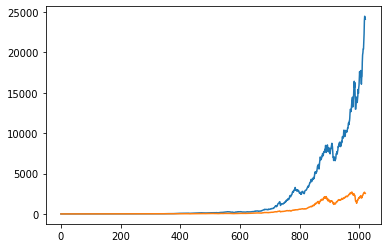

In [ ]:
# plot the accu returns  

p=plt.plot(CC_Port)
p1 = plt.plot(CC)